# Plotting Choropleth Bangladesh Map using Python
---
A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.


Load all districts from geojson file

In [1]:
from json import load
bd_districts=load(open('bangladesh_geojson_adm2_64_districts_zillas.json','r'))

Lets check all keys available in geojson file

In [2]:
bd_districts['features'][61].keys()

dict_keys(['type', 'geometry', 'properties', 'id'])

In [3]:
bd_districts["features"][61]['properties']

{'Shape_Leng': 4.33816671063,
 'Shape_Area': 0.305453340389,
 'ADM2_EN': 'Sylhet',
 'ADM2_PCODE': 'BD6091',
 'ADM2_REF': None,
 'ADM2ALT1EN': None,
 'ADM2ALT2EN': None,
 'ADM1_EN': 'Sylhet',
 'ADM1_PCODE': 'BD60',
 'ADM0_EN': 'Bangladesh',
 'ADM0_PCODE': 'BD',
 'date': '2015/01/01',
 'validOn': '2020/11/13',
 'ValidTo': None}

To get population info from wikipedia we can use pandas read_html module

In [4]:
import pandas as pd
dfs= pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Bangladesh')

In the website there are many tables available. These are stored in list format. We can check the lenth and by selecting the correct index we can get our required table.

In [5]:
len(dfs)

13

Store data as csv format for offline use

In [6]:
for i in range(len(dfs)):
    a = "Population (thousands)[28]" in dfs[i]
    if a == True:
        df=dfs[i].to_csv("Districts_of_Bangladesh.csv")
    

Storing csv data into a dataframe

In [7]:
df=pd.read_csv("Districts_of_Bangladesh.csv")

Checking dataframe head

In [8]:
df.head()

Unnamed: 0             District     Bengali Division  Established  \
0           0     Barguna District      বরগুনা  Barisal         1984   
1           1     Barisal District      বরিশাল  Barisal         1797   
2           2       Bhola District        ভোলা  Barisal         1984   
3           3   Jhalokati District     ঝালকাঠি  Barisal         1984   
4           4  Patuakhali District  পটুয়াখালী  Barisal         1969   

   Population (thousands)[28]  Area (km2)[28]  
0                         901            1940  
1                        2426            2786  
2                        1947            3405  
3                         711             751  
4                        1596            3221

Removing District string from each row as geojson data do not have this district level after each district name.

In [9]:
df.District

0         Barguna District
1         Barisal District
2           Bhola District
3       Jhalokati District
4      Patuakhali District
              ...         
59     Thakurgaon District
60       Habiganj District
61    Moulvibazar District
62      Sunamganj District
63         Sylhet District
Name: District, Length: 64, dtype: object

In [10]:
df.District = df.District.apply(lambda x: x.replace(" District",""))
    

In [11]:
df.District 

0         Barguna
1         Barisal
2           Bhola
3       Jhalokati
4      Patuakhali
         ...     
59     Thakurgaon
60       Habiganj
61    Moulvibazar
62      Sunamganj
63         Sylhet
Name: District, Length: 64, dtype: object

Now it is the time to map this dataframe with geojson file. For this we have to Index the district name for each dataframe. However, we can label a specific id for each district.

In [12]:
district_id_map = {}
for feature in bd_districts["features"]:
    feature["id"] = feature["id"]
    district_id_map[feature["properties"]["ADM2_EN"]] = feature["id"]

In [13]:
district_id_map

{'Bagerhat': 0,
 'Bandarban': 1,
 'Barguna': 2,
 'Barisal': 3,
 'Bhola': 4,
 'Bogura': 5,
 'Brahmanbaria': 6,
 'Chandpur': 7,
 'Chattogram': 8,
 'Chuadanga': 9,
 'Comilla': 10,
 "Cox's Bazar": 11,
 'Dhaka': 12,
 'Dinajpur': 13,
 'Faridpur': 14,
 'Feni': 15,
 'Gaibandha': 16,
 'Gazipur': 17,
 'Gopalganj': 18,
 'Habiganj': 19,
 'Jamalpur': 20,
 'Jessore': 21,
 'Jhalokati': 22,
 'Jhenaidah': 23,
 'Joypurhat': 24,
 'Khagrachhari': 25,
 'Khulna': 26,
 'Kishoreganj': 27,
 'Kurigram': 28,
 'Kushtia': 29,
 'Lakshmipur': 30,
 'Lalmonirhat': 31,
 'Madaripur': 32,
 'Magura': 33,
 'Manikganj': 34,
 'Moulvibazar': 35,
 'Meherpur': 36,
 'Munshiganj': 37,
 'Mymensingh': 38,
 'Naogaon': 39,
 'Narail': 40,
 'Narayanganj': 41,
 'Narsingdi': 42,
 'Natore': 43,
 'Chapainawabganj': 44,
 'Netrokona': 45,
 'Nilphamari': 46,
 'Noakhali': 47,
 'Pabna': 48,
 'Panchagarh': 49,
 'Patuakhali': 50,
 'Pirojpur': 51,
 'Rajbari': 52,
 'Rajshahi': 53,
 'Rangamati': 54,
 'Rangpur': 55,
 'Satkhira': 56,
 'Shariatpur': 57

Merge both dataframe according to id

In [14]:
df['id'] = df.District.apply(lambda x: district_id_map[x])

Now we can see an id column in the dataframe

In [15]:
df.head()

Unnamed: 0    District     Bengali Division  Established  \
0           0     Barguna      বরগুনা  Barisal         1984   
1           1     Barisal      বরিশাল  Barisal         1797   
2           2       Bhola        ভোলা  Barisal         1984   
3           3   Jhalokati     ঝালকাঠি  Barisal         1984   
4           4  Patuakhali  পটুয়াখালী  Barisal         1969   

   Population (thousands)[28]  Area (km2)[28]  id  
0                         901            1940   2  
1                        2426            2786   3  
2                        1947            3405   4  
3                         711             751  22  
4                        1596            3221  50

Renaming columns for looking good

In [16]:
df = df.rename(columns={
    'Population (thousands)[28]' : 'Population (thousands)',
    'Area (km2)[28]' : 'Area (km2)' })

A bar plot can be used to show population level in each district

In [17]:
import numpy as np
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, .7, 64))

<AxesSubplot:xlabel='District'>

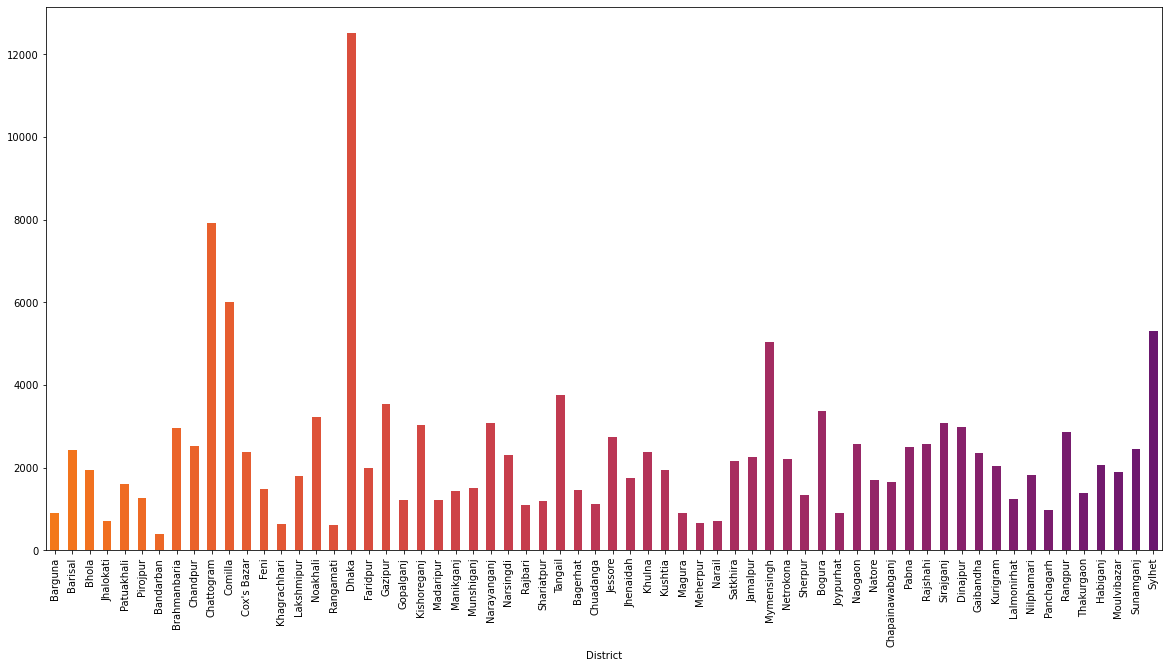

In [18]:
df.set_index('District')["Population (thousands)"].plot.bar(
    xlabel='District',
    rot=90,
    figsize=(20,10),
    fontsize=10,
    color=color
    )

Now lets make choropleth map of Bangladesh with population density

In [19]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'browser'

In [20]:
fig = px.choropleth(
    df,
    locations='id',
    geojson=bd_districts,
    color='Population (thousands)',
    title='Bangladesh Population',
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

As Dhaka has the most population, this part looks yellow. But others are not showing well as these locations have very few population against Dhaka. However, we can make log scale to solve the issue.

In [21]:
df['Population scale'] = np.log10(df['Population (thousands)'])

Now, dataframe has new column named "Population scale"

In [22]:
df.head()

Unnamed: 0    District     Bengali Division  Established  \
0           0     Barguna      বরগুনা  Barisal         1984   
1           1     Barisal      বরিশাল  Barisal         1797   
2           2       Bhola        ভোলা  Barisal         1984   
3           3   Jhalokati     ঝালকাঠি  Barisal         1984   
4           4  Patuakhali  পটুয়াখালী  Barisal         1969   

   Population (thousands)  Area (km2)  id  Population scale  
0                     901        1940   2          2.954725  
1                    2426        2786   3          3.384891  
2                    1947        3405   4          3.289366  
3                     711         751  22          2.851870  
4                    1596        3221  50          3.203033

Changing color to 'Population scale' and adding hover_name with hover_data the we can get a more informative graph.

In [23]:
fig = px.choropleth(
    df,
    locations='id',
    geojson=bd_districts,
    color='Population scale',
    hover_name='Bengali',
    hover_data=['Population (thousands)','Area (km2)'],
    title='Bangladesh Population'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

Customizing choropleth graph with mapbox looks more better.

In [24]:
px.choropleth_mapbox(df,
    locations='id',
    geojson=bd_districts,
    color='Population scale',
    hover_name='Bengali',
    hover_data=['Population (thousands)','Area (km2)'],
    title='Bangladesh Population',
    mapbox_style='carto-positron',
    center= { 'lat' : 23.6850, 'lon' : 90.3563},
    zoom=4.8,
    opacity=0.6)